<a href="https://colab.research.google.com/github/pedrogfsilva/rnnComBiblioteca/blob/main/Atividade_RNN_com_biblioteca_Pedro_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

## Escolha do Dataset

O dataset escolhido é o "Univariate Time Series". Este conjunto de dados é projetado para ajudar os usuários a aprender e implementar modelos de séries temporais univariadas.

O dataset contém as seguintes colunas:

- Date: A data em que a observação foi registrada.

- count: O valor observado na data correspondente. Este atributo numérico representa a variável que será prevista.

In [34]:
# carregando o dataset
data = pd.read_csv('/content/drive/MyDrive/PonderadaNLUSemana2/date_count.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [35]:
# normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['count'].values.reshape(-1, 1))

In [36]:
# criando os conjuntos de dados de treino e teste
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [37]:
# função para criar o conjunto de dados com janelas
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [38]:
# número de passos de tempo
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [39]:
# reshape para [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Modelo de predição usando uma RNN

In [40]:
# criando o modelo RNN
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
# treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0392
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0103
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0076
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0074
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0083
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0086
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0076
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0081
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0068
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0070
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [42]:
# fazendo previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [43]:
# invertendo a normalização
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Métrica Escolhida

Para este tipo de problema de previsão de séries temporais uma métrica comumente escolhida é a Root Mean Squared Error (RMSE). Esta métrica é bastante utilizada porque:

- Sensibilidade a Erros: O RMSE penaliza erros maiores mais severamente do que erros menores, o que é importante em previsões onde grandes desvios podem ter consequências significativas.

- Interpretação: O RMSE é expresso na mesma unidade que a variável de interesse, o que facilita a interpretação dos resultados.

In [44]:
# calculando o RMSE
train_rmse = np.sqrt(np.mean((train_predict - scaler.inverse_transform(y_train.reshape(-1, 1)))**2))
test_rmse = np.sqrt(np.mean((test_predict - scaler.inverse_transform(y_test.reshape(-1, 1)))**2))

print(f'Treino RMSE: {train_rmse}')
print(f'Teste RMSE: {test_rmse}')

Treino RMSE: 18.571710548003818
Teste RMSE: 43.02580368486981


## Gráfico comparando o valor real com o valor predito

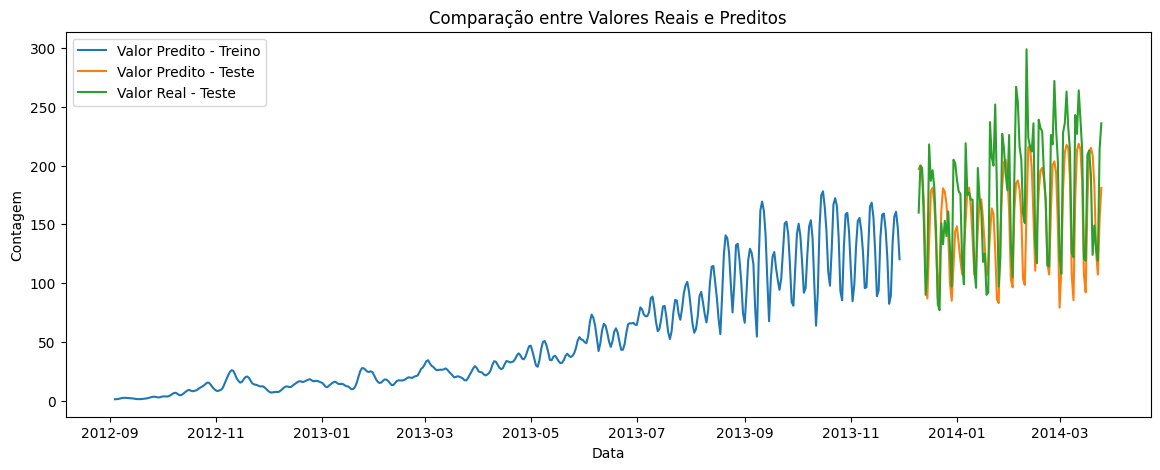

In [45]:
# criando gráfico para comparar valores reais e preditos
plt.figure(figsize=(14, 5))

plt.plot(data.index[time_step:train_size], train_predict, label='Valor Predito - Treino')

# plotando os valores preditos e reais do conjunto de teste
plt.plot(data.index[train_size + time_step:], test_predict, label='Valor Predito - Teste')
plt.plot(data.index[train_size + time_step:], data['count'].values[train_size + time_step:], label='Valor Real - Teste')

plt.xlabel('Data')
plt.ylabel('Contagem')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.show()